In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')
from sklearn.metrics import mean_squared_error as mse

In [4]:
data = pd.read_csv("Transformed_Housing_Data2.csv")
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})

STEP-1

In [2]:
def param_init(Y):
    m=0.1
    c= Y.mean()
    return m,c


STEP-2

In [6]:
def generate_predictions(m,c,X):
    prediction=[]
    for x in X:
        pred= (m*x) +c
        prediction.append(pred)
    return prediction

STEP-3

In [11]:
def compute_cost(prediction, Y):
    cost = np.sum((prediction-Y)**2)/len(Y)
    return cost

STEP-4

In [8]:
def gradients(prediction,Y,X):
    n= len(Y)

    Gm= 2/n* np.sum((prediction-Y)*X)
    Gc= 2/n * np.sum(prediction-Y)
    return Gm, Gc

In [9]:
def update_param(m_old, c_old, Gm_old, Gc_old, alpha):
    m_new= m_old - alpha*(Gm_old)
    c_new = c_old- alpha*(Gc_old)
    return m_new, c_new

In [25]:
max_iter=500
def result (m,c, X, Y, cost, prediction, i):
    if i< max_iter -1:
        print ("Gradient descent has converged at iteration {} ".format(i))
    else:
        print ("Result after", max_iter, "iterations is:")
      ## plotting the final result
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X, Y, color = 'red', label = 'data points')
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, prediction, color = 'green', label = label)
    plt.xlabel('flat_area')
    plt.ylabel('sale_price')
    plt.title('final regression line')
    plt.legend()


After iteration 0 :m= 0.11316346413633305 : c= 1.1849780416165836e-16 : COst= 0.8583653586366701
After iteration 20 :m= 0.3275595607435688 : c= 1.240489192847842e-16 : COst= 0.6182472245590184
After iteration 40 :m= 0.4706921039517346 : c= 1.3248661427193537e-16 : COst= 0.5112264752046606
After iteration 60 :m= 0.5662485308150865 : c= 1.415904430738617e-16 : COst= 0.4635272839862899
After iteration 80 :m= 0.6300427631414932 : c= 1.4951003398285442e-16 : COst= 0.4422677351921283
After iteration 100 :m= 0.6726323011945988 : c= 1.611303683072644e-16 : COst= 0.4327923457067555
After iteration 120 :m= 0.7010654163122192 : c= 1.666074685620818e-16 : COst= 0.4285691607855322
After iteration 140 :m= 0.7200475906265729 : c= 1.6660746856208182e-16 : COst= 0.4266868855601835
After iteration 160 :m= 0.7327202415200801 : c= 1.669405354694694e-16 : COst= 0.4258479547318988
After iteration 180 :m= 0.7411806042798547 : c= 1.6694053546946945e-16 : COst= 0.4254740429228453
After iteration 200 :m= 0.7468

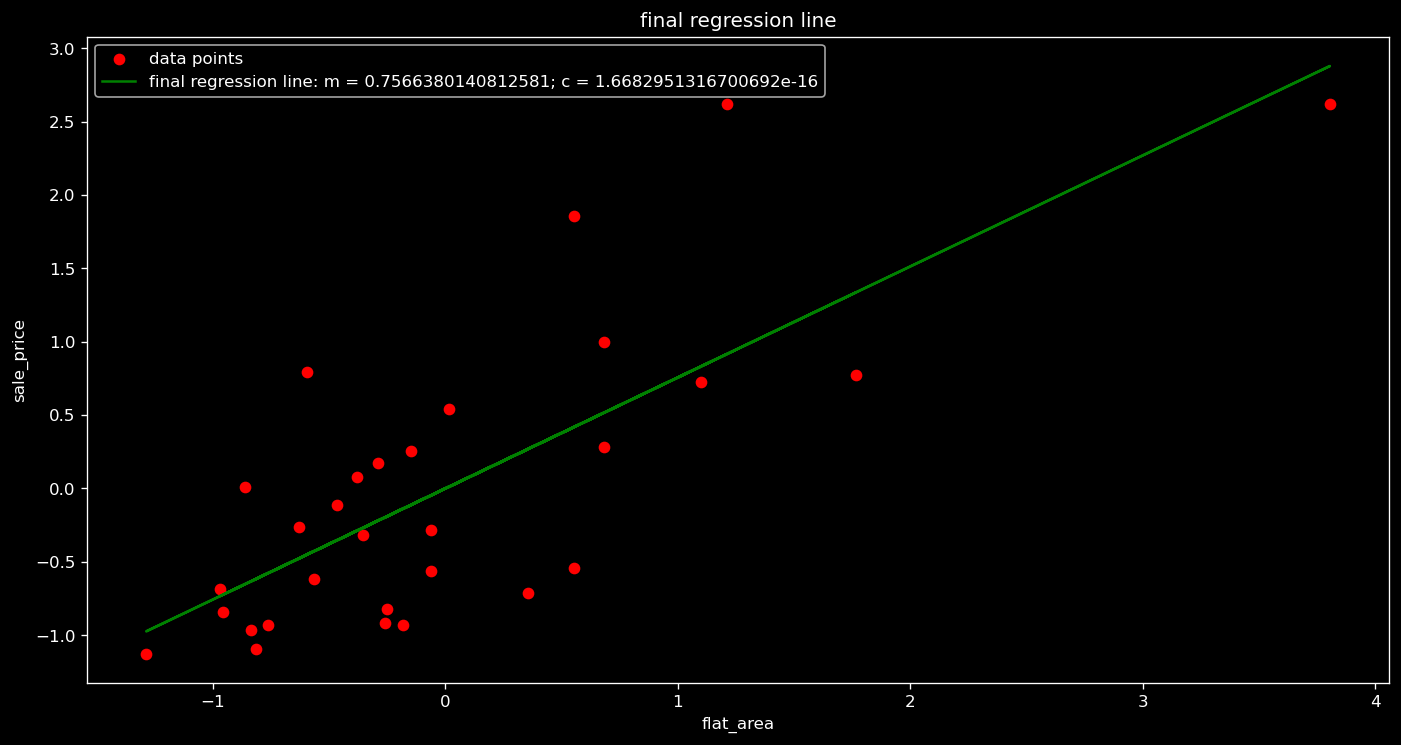

In [26]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area= scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))


cost_old = 0
alpha = 0.01


##step1 - inital m, c

m,c = param_init(sale_price)

## Gradient descent in action
for i in range (0, max_iter):
    ## step 2- generating predictions
    predictions= generate_predictions(m,c, flat_area)

    ## step3 - compute cost
    cost_new= compute_cost(predictions, sale_price)

    ##checking if GD converged
    if abs(cost_new- cost_old)< 10**(-7):
        break

    ## step 4 - gradients values first
    Gm, Gc = gradients(predictions, sale_price, flat_area)

    ##update param 
    m, c= update_param(m,c,Gm, Gc,alpha)

    if i%20==0 :
        print ('After iteration', i, ':m=', m, ': c=',c , ': COst=', cost_new)

    cost_old= cost_new

##final results
result(m,c , flat_area, sale_price, cost_new, predictions, i)
    